## Шевцова Софья
группа 20930

15 вариант

Iris virginica, Длина чашелистика, Ширина лепестка

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import statistics

df = pd.read_csv('iris.csv', sep=',') # чтение файла
df = df.drop(df[df.name != 'Iris-virginica'].index) # выбираем необходимый вид ирисов
# 3.1
print('3.1. Проверить гипотезу о независимости переменных по критерию Хи-квадрат')

leni = 6  # По формуле Стьюдента
x = pd.Series(df['sepal_length']) # длина чашелистиков
y = pd.Series(df['petal_width']) # ширина лепестков

l = []
for i in range(6):
    l.append([0, 0, 0, 0, 0, 0])

for n1, n2 in zip([4.8, 5.3, 5.8, 6.3, 6.8, 7.3], [5.3, 5.8, 6.3, 6.8, 7.3, 8.0]): # интервалы для длины чашелистика
    s = x.between(n1, n2)
    for m1, m2 in zip([1.4, 1.5, 1.6, 1.7, 1.8, 1.9], [1.5, 1.6, 1.7, 1.8, 1.9, 2.5]): # интервалы для ширины лепестка
        k = y.between(m1, m2)
        df2 = pd.concat([s, k], axis=1)
        for i in range(100, 150): # virginica в таблице от 100 до 150
            if df2['sepal_length'][i] == True and df2['petal_width'][i] == True:
                ind1 = int((n1 - 4.8) / 0.5) # 0.5 - длина интервала
                ind2 = int((m1 - 1.4) / 0.1) # 0.1 -длина интервала
                l[ind1][ind2] += 1
df4 = pd.DataFrame(l, index=["(4.8;5.3]", "(5.3;5.8]", "(5.8;6.3]", "(6.3;6.8]", "(6.8;7.3]", "(7.3;8.0)"],
                   columns=['[1.4;1.5]', '(1.5;1.6]', '(1.6;1.7]', '(1.7;1.8]', '(1.8;1.9]', '(1.9;2.5]']).T
df4['i'] = df4.sum(axis=1) # суммируем
df4.loc['j'] = df4.sum()
n = 0
for i, j in zip(["(4.8;5.3]", "(5.3;5.8]", "(5.8;6.3]", "(6.3;6.8]", "(6.8;7.3]", "(7.3;8.0)"], range(6)):
    n += df4[i][j]**2 / (df4[i][6] * df4["i"][j])
n -= 1
n *= len(df['sepal_length'])
xi = 37.6   # Из таблицы распределения Хи квадрата

if n > xi:
    print('Отвергается, т.к', n, '>', xi)
else:
    print('Подтверждается, т.к.', n, '<', xi)

3.1. Проверить гипотезу о независимости переменных по критерию Хи-квадрат
Подтверждается, т.к. -40.689588189588186 < 37.6


In [3]:
# 3.2
print('3.2. Вычислить оценку ковариации коэффициента корреляции. Проверить гипотезу о незначимости коэффициента корреляции')

meanx = statistics.mean(df['sepal_length']) # Находим выборочные среднее длины чашелистика
meany = statistics.mean(df['petal_width']) # Находим выборочные среднее ширины лепестка
subx = [i - meanx for i in df['sepal_length']] # По формуле отнимаем от элементов выборок x и y их среднее
suby = [i - meany for i in df['petal_width']] 

cov = (sum([subx[i] * suby[i] for i in range(len(subx))])) / (len(df['petal_width']) - 1)
print("Оценка ковариации коэффиециента корреляции", cov)

VAL = np.vstack((df['sepal_length'], df['petal_width'])) # соединяем две выборки по вертикали
rxy = np.corrcoef(VAL) # библиотечная функция
rxy = rxy[1][0]
t = (rxy * (len(df['petal_width']) - 2)**0.5) / (1 - rxy ** 2) ** 0.5
st = 2.57 # из таблицы Стьюдента для уровня значимости 0.99
print("Коэффициент корреляции", rxy)
if st > t:
    print("Гипотеза подтверждается ", st, ">", t)
else:
    print("Гипотеза отвергается", st, "<", t)

3.2. Вычислить оценку ковариации коэффициента корреляции. Проверить гипотезу о незначимости коэффициента корреляции
Оценка ковариации коэффиециента корреляции 0.04909387755102044
Коэффициент корреляции 0.2811077091573194
Гипотеза подтверждается  2.57 > 2.02940459390154


3.3. Оценить параметры линейной регрессии, вычислить коэффициент детерминации, проверить значимость модели по критерию Фишера


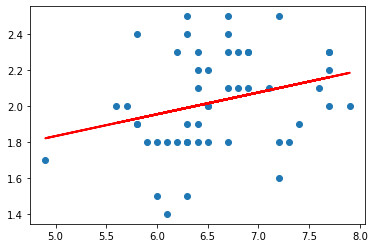

Уравнение линейной регрессии: Y = 1.23 + 0.121X
Коэффициент детерминации  0.07902154414767608
Не значимая модель 4.118483005748674 > 4.04


In [5]:
# 3.3
print("3.3. Оценить параметры линейной регрессии, вычислить коэффициент детерминации, проверить значимость модели по критерию Фишера")

x = df['sepal_length'].values.reshape(-1, 1)
y = df['petal_width'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x, y)
plt.scatter(df['sepal_length'], df['petal_width'])
plt.plot(df['sepal_length'], reg.predict(x), color='red', linewidth=2)
plt.show()
print("Уравнение линейной регрессии: Y = {:.3} + {:.3}X".format(reg.intercept_[0], reg.coef_[0][0]))

de = rxy**2
print("Коэффициент детерминации ", de)

m = 1
f = (de/(1-de)) * (len(df['petal_width']) - m - 1)/m
fi = 4.04   # При уровне значимости 0.05 по таблице F-распределения
if f > fi:
    print("Не значимая модель", f, ">", fi)
else:
    print("Значимая модель", f, "<", fi)